In [23]:
import pandas as pd
import numpy as np
from math import log2
def log_safe(x):
    return log2(x) if x>0 else 0

path = "datas/xigua.csv"
df = pd.read_csv(path)

##计算根结点中label=0的占比
f1 = df[df["label"]==0].shape[0]/df.shape[0]
##计算根结点中label=1的占比
f2 = 1 - f1
##计算根结点香农熵
ent = -(f1*log_safe(f1)+f2*log_safe(f2))

##获取x1=青绿的样本集合
df1 = df[df["x1"]=="青绿"]
##计算x1=青绿的样本集合下label=0的占比
f1 = df1[df1["label"]==0].shape[0]/df1.shape[0]
##计算x1=青绿的样本集合下label=1的占比
f2 = 1 - f1
##计算x1=青绿的样本集合下香农熵
ent1 = -(f1*log_safe(f1)+f2*log_safe(f2))

##获取x1=乌黑的样本集合
df2 = df[df["x1"]=="乌黑"]
##计算x1=乌黑的样本集合下label=0的占比
f1 = df2[df2["label"]==0].shape[0]/df2.shape[0]
##计算x1=乌黑的样本集合下label=1的占比
f2 = 1 - f1
##计算x1=乌黑的样本集合下香农熵
ent2 = -(f1*log_safe(f1)+f2*log_safe(f2))

##获取x1=浅白的样本集合
df3 = df[df["x1"]=="浅白"]
##计算x1=浅白的样本集合下label=0的占比
f1 = df3[df3["label"]==0].shape[0]/df3.shape[0]
##计算x1=浅白的样本集合下label=1的占比
f2 = 1 - f1
##计算x1=浅白的样本集合下香农熵
ent3 = -(f1*log_safe(f1)+f2*log_safe(f2))

##计算香农熵增益
ent - (df1.shape[0]/df.shape[0]*ent1+df2.shape[0]/df.shape[0]*ent2+df3.shape[0]/df.shape[0]*ent3)

0.10812516526536531

In [48]:
import pandas as pd
import numpy as np
from math import log2
def log_safe(x):
    return log2(x) if x>0 else 0

path = "datas/xigua.csv"
df = pd.read_csv(path)

##计算根结点中label=0的占比
f1 = df[df["label"]==0].shape[0]/df.shape[0]
##计算根结点中label=1的占比
f2 = 1 - f1
##计算根结点香农熵
ent = -(f1*log_safe(f1)+f2*log_safe(f2))
df = df.sort_values(by="x2")

for i in range(1,df.shape[0]):  #遍历所有划分点
    df1 = df.iloc[:i,:]     #获取左子树的样本
    f1 = df1[df1["label"]==0].shape[0]/df1.shape[0]  # 计算样本左子树中label=0的占比
    f2 = 1 - f1 # 计算左子树中label=1的占比
    ent1 = -(f1*log_safe(f1)+f2*log_safe(f2))# 计算左子树的香农熵

    df2 = df.iloc[i:,:]#获取右子树的样本
    f1 = df2[df2["label"]==0].shape[0]/df2.shape[0]# 计算样本右子树中label=0的占比
    f2 = 1 - f1# 计算右子树中label=1的占比
    ent2 = -(f1*log_safe(f1)+f2*log_safe(f2))# 计算右子树的香农熵
    
#     计算信息增益
    a = ent - (df1.shape[0]/df.shape[0]*ent1 + df2.shape[0]/df.shape[0]*ent2)
    print(a)

0.05632607578088
0.1179805181500242
0.1861381990467904
0.2624392604045631
0.09349869023672441
0.03020211515891169
0.003585078590305768
0.002226985278291793
0.002226985278291793
0.003585078590305768
0.03020211515891169
0.006046489176565584
0.0007697888924075302
0.024085993037174624
0.00033345932649475607
0.06696192680347068


In [14]:
import pandas as pd
import numpy as np
from math import log2
def log_safe(x):
    return log2(x) if x>0 else 0

path = "datas/xigua.csv"
df = pd.read_csv(path)

##计算根结点不纯度（方差）
impurity = np.var(df["score"])
print("impurity",impurity)
##按照x2排序
df = df.sort_values(by="x2")
df

impurity 1106.8512110726642


,x1,x2,x3,label,score
9,青绿,0.243,0.267,1,22
10,浅白,0.245,0.057,1,16
11,浅白,0.343,0.099,1,29
14,乌黑,0.360,0.370,1,15
5,青绿,0.403,0.237,0,88
7,乌黑,0.437,0.211,0,94
6,乌黑,0.481,0.149,0,85
4,浅白,0.556,0.215,0,91
15,浅白,0.593,0.042,1,24
3,青绿,0.608,0.318,0,79


In [ ]:
for i in range(1,df.shape[0]):  #遍历所有划分点
    df1 = df.iloc[:i,:]     #获取左子树的样本
    impurity1 = np.var(df1["score"])# 计算左子树的不纯度（方差）

    df2 = df.iloc[i:,:]#获取右子树的样本
    impurity2 = np.var(df2["score"])# 计算右子树的不纯度（方差）
    
#     计算信息增益
    a = impurity - (df1.shape[0]/df.shape[0]*impurity1 + df2.shape[0]/df.shape[0]*impurity2)
    print(i,a,impurity1,impurity2)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1)
model.fit(df[["x2"]],df["score"])
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(model, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

53.20415224913472 0.0 1119.5
138.04336793540972 9.0 1096.782222222222
178.26997857966694 28.222222222222218 1121.5153061224491
289.55256853872766 31.25 1059.1597633136093
122.92964244521306 754.0 1079.7222222222224
28.091852783893955 1128.3333333333333 1051.719008264463
1.2184379634206834 1172.9795918367345 1058.49
12.995001922337451 1211.5 989.2839506172838
0.1616685890039662 1171.8024691358025 1033.4375
13.937765694513018 1122.4099999999999 1050.7755102040817
66.11769948621122 1103.4214876033059 925.8055555555557
11.164936562860248 1174.388888888889 906.8
1.0231567740217997 1172.698224852071 888.5
17.96745757126382 1114.454081632653 969.5555555555557
1.9492502883506404 1069.6888888888889 1369.0
104.16003460207605 1065.359375 0.0


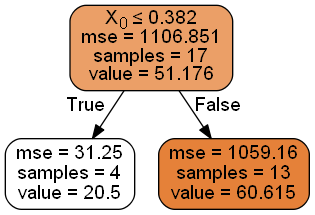

In [13]:
import pandas as pd
import numpy as np
from math import log2
def log_safe(x):
    return log2(x) if x>0 else 0

path = "datas/xigua.csv"
df = pd.read_csv(path)

imp = np.var(df["score"])
df = df.sort_values(by="x2")

for i in range(1,df.shape[0]):  #遍历所有划分点
    df1 = df.iloc[:i,:]     #获取左子树的样本
    imp1 = np.var(df1["score"])# 计算左子树的方差

    df2 = df.iloc[i:,:]#获取右子树的样本
    imp2 = np.var(df2["score"])# 计算左子树的方差
#     计算信息增益
    a = imp - (df1.shape[0]/df.shape[0]*imp1 + df2.shape[0]/df.shape[0]*imp2)
    print(a,imp1,imp2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1)
model.fit(df[["x2"]],df[["score"]])
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(model, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 
